# Final Lab
# Lab 7
## Problem 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson

In [2]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile)

# list all keys of the files
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

For my part of Lab 7 and 8, I will be using the data with pT range of 250 to 500.

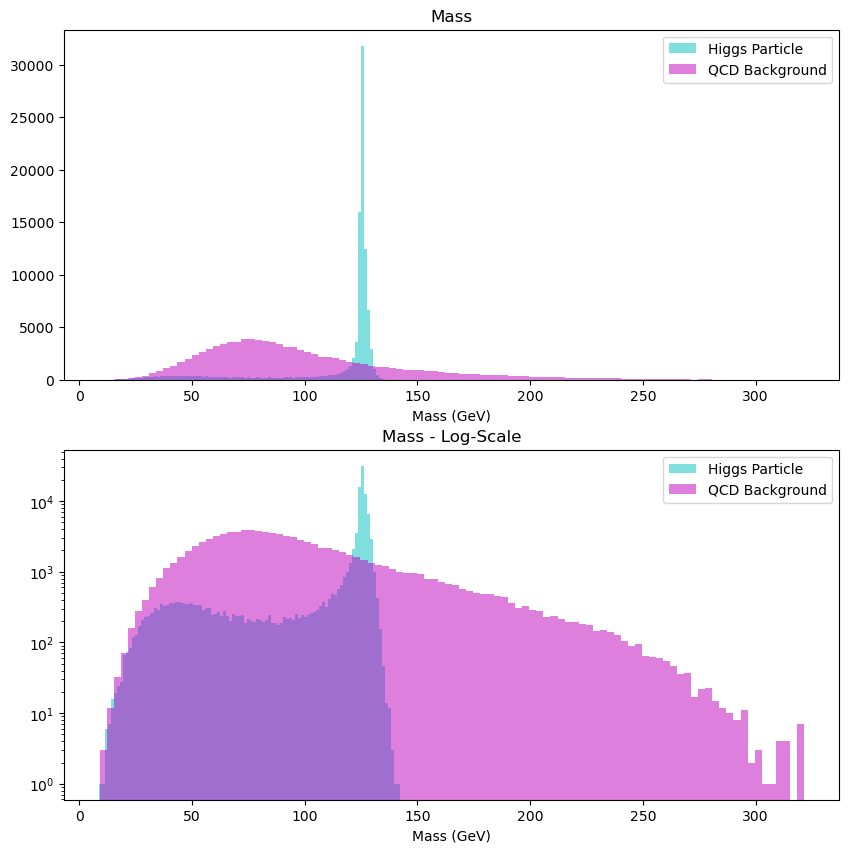

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(0,2):
    ax[i].hist(higgs['mass'], bins=100, color='c', alpha=0.5, label='Higgs Particle')
    ax[i].hist(qcd['mass'], bins=100, color='m', alpha=0.5, label='QCD Background')
    ax[i].legend(loc='upper right')
    ax[i].set_xlabel("Mass (GeV)")

# Graph details that differ between log and non-log scale visualizations
ax[0].set_title('Mass')
ax[1].set_title(f"{'Mass'} - Log-Scale")
ax[1].set_yscale('log')

plt.show()

Above is the graph of mass for both Higgs and QCD background in their log scale and non-log scale. 

In [5]:
qcdMu = np.mean(qcd['mass'])
higgsMu = np.mean(higgs['mass'])
mu = ((qcdMu+higgsMu)/2)
mu

106.31521380117388

We calculate the mean values for both our QCD and Higgs data and find the poisson mean at 106.315

In [6]:
cdf = stats.poisson.cdf(106.315,mu=85)
sig = stats.norm.ppf(cdf)
signif = 50/np.sqrt(2000)
print(f"Best-Fit Significance: {sig}")
print(f"Actual Significance: {signif}")

Best-Fit Significance: 2.260211061828308
Actual Significance: 1.118033988749895


## Problem 2

In [7]:
def count_for_sig(low, high, feature):
    higgs_count=1
    qcd_count=1
    for hval,qval in zip(
        higgs[feature],
        qcd[feature]):
        if low <= hval <= high:
            higgs_count+=1
        if low <= qval <= high:
            qcd_count+=1
    n = 50*(higgs_count/100000)
    d = np.sqrt(2000*(qcd_count/100000))
    sig = n/d
    print(f"The significance if you use a threshold from {low}"
          f" to {high} on the {feature} feature is: {sig}")

In [8]:
xlow = [min(round(higgs['mass'])),100,124]
xhigh = [max(round(higgs['mass'])),140,128]
    
for i in range(0,len(xlow)):
    count_for_sig(xlow[i], xhigh[i],'mass')

The significance if you use a threshold from 9.0 to 142.0 on the mass feature is: 1.210993133926482
The significance if you use a threshold from 100 to 140 on the mass feature is: 1.9895040813778704
The significance if you use a threshold from 124 to 128 on the mass feature is: 4.876792061324687


We continue with the maximium significance which is the threshold of 124 to 128 that gives a significance of 4.876.

## Problem 3

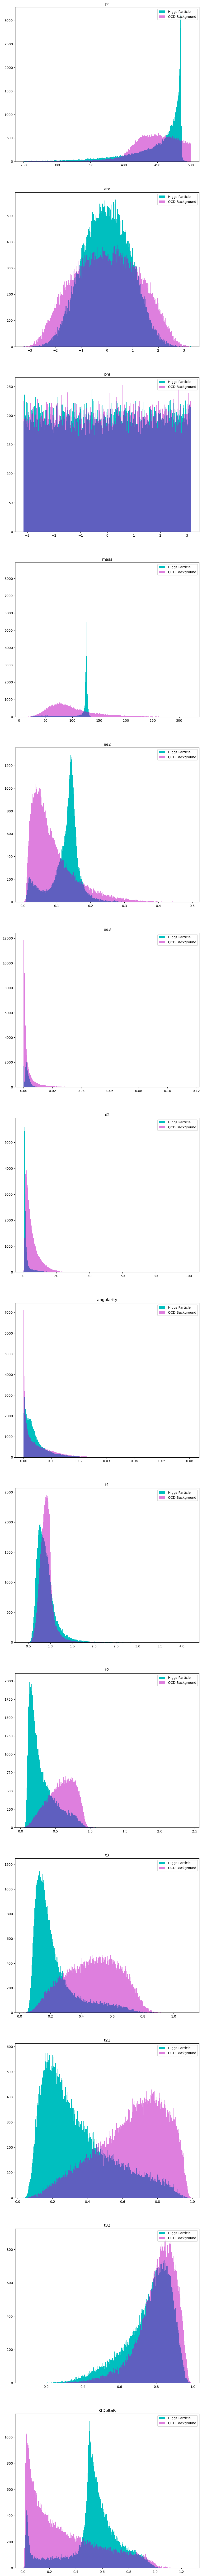

In [9]:
features_list = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    ax[i].hist(higgs[features_list[i]], 500, color='c', label="Higgs Particle")
    ax[i].hist(qcd[features_list[i]], 500, color='m', alpha=.5, label="QCD Background")
    ax[i].set_title(features_list[i])
    ax[i].legend(loc='upper right')
    
plt.show() 

We continue by still only optimize with mass. We will be using the best threshold found in problem 2.

In [10]:
def select_indexes(low, high, feature):
    indexes = []
    feature_list = list(feature)
    
    for qval in feature_list:
        if low <= qval <= high:
            indexes.append(feature_list.index(qval))
            
    return indexes

In [11]:
qcd_feature = qcd['mass']
qcd_mass_indexes = select_indexes(124,128,qcd_feature)

h_feature =higgs['mass']
h_mass_indexes = select_indexes(124,128,h_feature)

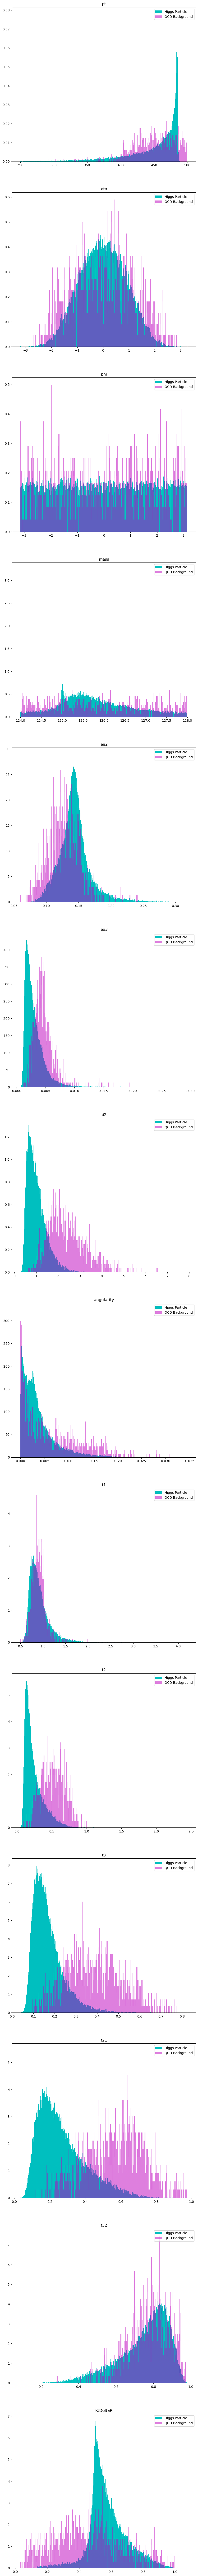

In [12]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    qcd_optimized_mass = []
    for ind in qcd_mass_indexes:
        qcd_optimized_mass.append(qcd[features_list[i]][ind])
        
    higgs_optimized_mass = []
    for ind in h_mass_indexes:
        higgs_optimized_mass.append(higgs[features_list[i]][ind])
        
    ax[i].hist(higgs_optimized_mass, 500, density=True, color='c', label="Higgs Particle") 
    ax[i].hist(qcd_optimized_mass, 500, density=True, alpha=.5, color='m', label="QCD Background") 
    ax[i].set_title(features_list[i])  
    ax[i].legend(loc='upper right')
    
plt.show() 

I want to further optimize with t21 and d2:
t21 gives a different peak between the background and the higgs.
d2 gives a very high peak of higgs.

In [13]:
numerator = 50*(len(h_mass_indexes)/100000)
denominator = np.sqrt(2000*(len(qcd_mass_indexes)/100000))
significance = numerator/denominator
print(significance)

4.877985060559834


I pick the threshold for both d2 and t21 based on the above plots.

In [14]:
count_for_sig(0,0.5,'d2')
count_for_sig(0,.7,'t21')

The significance if you use a threshold from 0 to 0.5 on the d2 feature is: 1.1443108583009827
The significance if you use a threshold from 0 to 0.7 on the t21 feature is: 1.4037623331924443


## Problem 4

In [15]:
qcd_d2_feature = []
for ind in qcd_mass_indexes:
    qcd_d2_feature.append(qcd['d2'][ind])
        
qcd_t21_feature = []
for ind in qcd_mass_indexes:
    qcd_t21_feature.append(qcd['t21'][ind])

higgs_d2_feature = []
for ind in h_mass_indexes:
    higgs_d2_feature.append(higgs['d2'][ind])
        
higgs_t21_feature = []
for ind in h_mass_indexes:
    higgs_t21_feature.append(higgs['t21'][ind])

qcd_d2_indexes = select_indexes(0,.5,qcd_d2_feature)
qcd_tau21_indexes = select_indexes(0,.7,qcd_t21_feature)
h_d2_indexes = select_indexes(0,.5,higgs_d2_feature)
h_tau21_indexes = select_indexes(0,.7,higgs_t21_feature)

In [16]:
qcd_master_list = []
higgs_master_list = []
qcd_master_list.extend(qcd_mass_indexes)
qcd_master_list.extend(qcd_d2_indexes)
qcd_master_list.extend(qcd_tau21_indexes)
higgs_master_list.extend(h_mass_indexes)
higgs_master_list.extend(h_d2_indexes)
higgs_master_list.extend(h_tau21_indexes)
qcd_unique_indexes = list(set(qcd_master_list))
higgs_unique_indexes = list(set(higgs_master_list))

numerator = 50*(len(higgs_unique_indexes)/100000)
denominator = np.sqrt(2000*(len(qcd_unique_indexes)/100000))
significance = numerator/denominator
         
print(f"The significance after applying ideal thresholds to Mass, D2, and Tau21"
        f" subjettiness features is: {significance}")

The significance after applying ideal thresholds to Mass, D2, and Tau21 subjettiness features is: 5.125794013284876


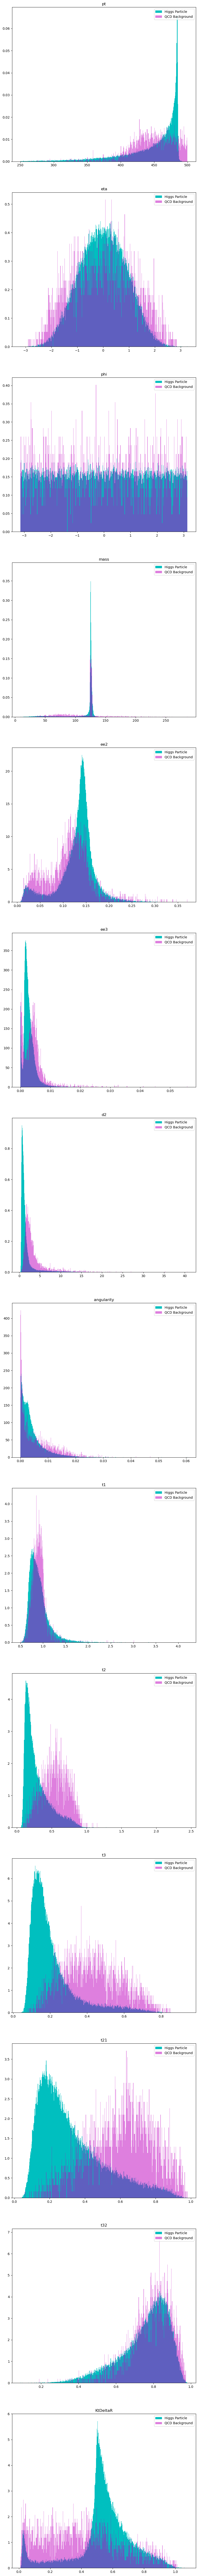

In [17]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    qcd_optimized_fin = []
    for ind in qcd_unique_indexes:
        qcd_optimized_fin.append(qcd[features_list[i]][ind])
        
    higgs_optimized_fin = []
    for ind in higgs_unique_indexes:
        higgs_optimized_fin.append(higgs[features_list[i]][ind])
        
    ax[i].hist(higgs_optimized_fin, 500, density=True, color='c', label='Higgs Particle')
    ax[i].hist(qcd_optimized_fin, 500, density=True, alpha=.5, color='m', label='QCD Background')
    ax[i].set_title(features_list[i])  
    ax[i].legend(loc='upper right')
    
plt.show() 

There are some improvements in the mass plot; with much less noises than before.
Cuts with d2, Tau21 Subjettiness, and Mass got us a significance of 5.1 which already met the 5 sigma standard.

# Lab 8
## Problem 1

In [18]:
import h5py

P1 = h5py.File('data_highLumi_pt_250_500.h5', 'r')
highLum = np.array(P1.get('data/block0_values'))
P1.close()

P2 = h5py.File('data_lowLumi_pt_250_500.h5', 'r')
lowLum = np.array(P2.get('data/block0_values'))
P2.close()

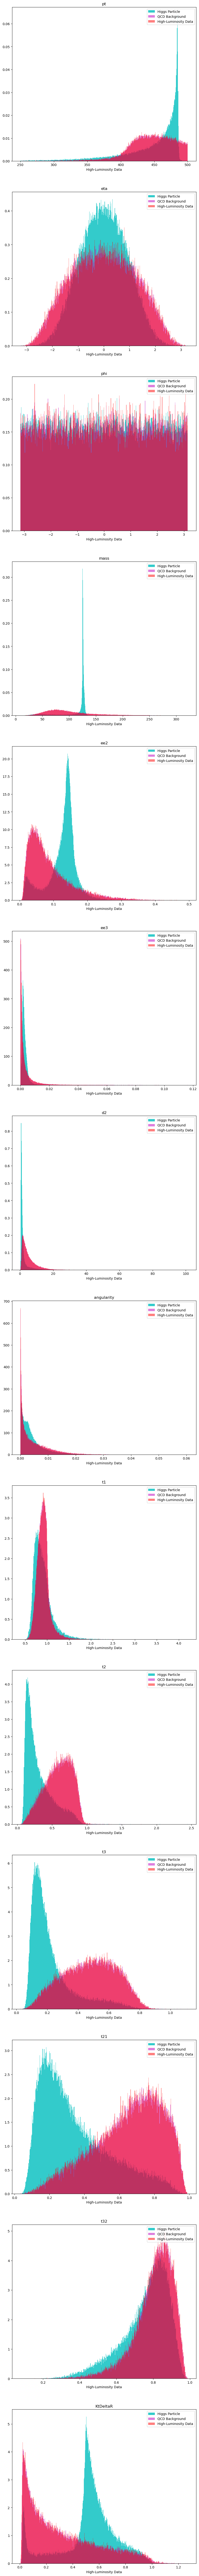

In [19]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(0,14):
    ax[i].hist(higgs[features_list[i]], 500, alpha=.8, color = 'c', density=True, label='Higgs Particle')
    ax[i].hist(qcd[features_list[i]], 500, alpha=.5, color = 'm', density=True, label='QCD Background')
    ax[i].hist(highLum[:,i], bins=500, alpha=.5, color = 'r', density=True, label="High-Luminosity Data" )
    ax[i].set_title(features_list[i])  
    ax[i].set_xlabel("High-Luminosity Data")
    ax[i].legend(loc='upper right')
    
plt.show()

I still want to optimize the data with: 
d2 0-0.5;
t21 0-0.7;
mass 124-128

In [20]:
# Get the data for the features we want
hl_mass_feature_raw = highLum[:,3]
hl_d2_feature_raw = highLum[:,6]
hl_tau21_feature_raw = highLum[:,11]

# Select the indexes we want to keep 
hl_mass_indexes = select_indexes(124,128,hl_mass_feature_raw)

# Optimize all on mass first
hl_tau21_feature_optimized = []
hl_d2_feature_optimized = []
for ind in hl_mass_indexes:
    hl_tau21_feature_optimized.append(hl_tau21_feature_raw[ind])
    hl_d2_feature_optimized.append(hl_d2_feature_raw[ind])

# Get indexes of remaining features we want to keep 
hl_d2_indexes = select_indexes(0,.5,hl_d2_feature_optimized)
hl_tau_indexes = select_indexes(0,.7,hl_tau21_feature_optimized) 

In [21]:
# Creating and uniquifying the master lists to use for significance and graphing
hl_master_list = []

hl_master_list.extend(hl_d2_indexes)
hl_master_list.extend(hl_tau_indexes)
hl_master_list.extend(hl_mass_indexes)
hl_unique_indexes = list(set(hl_master_list))

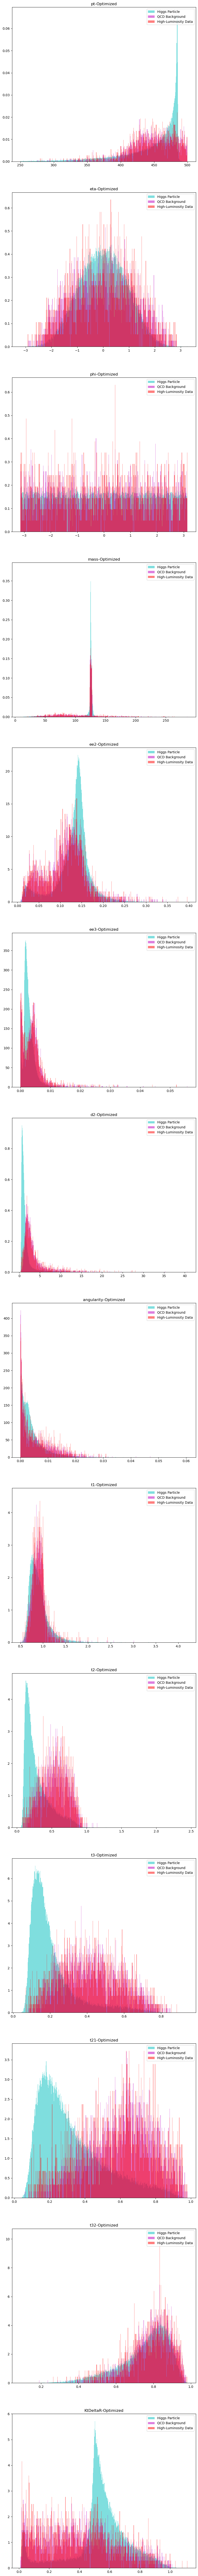

In [22]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(0,14):
    hl_optimized_fin = []
    for ind in hl_unique_indexes:
        hl_optimized_fin.append(highLum[:,i][ind])
    
    qcd_optimized_fin = []
    for ind in qcd_unique_indexes:
        qcd_optimized_fin.append(qcd[features_list[i]][ind])
        
    higgs_optimized_fin = []
    for ind in higgs_unique_indexes:
        higgs_optimized_fin.append(higgs[features_list[i]][ind])
        
    ax[i].hist(higgs_optimized_fin, 500, alpha=.5, color='c', density=True, label='Higgs Particle') 
    ax[i].hist(qcd_optimized_fin, 500, alpha=.5, color='m', density=True, label='QCD Background')  
    ax[i].hist(hl_optimized_fin, 500, alpha=.5, color='r', density=True, label="High-Luminosity Data")  
    ax[i].set_title(f"{features_list[i]}-Optimized")  
    ax[i].legend(loc='upper right')
    
plt.show() 

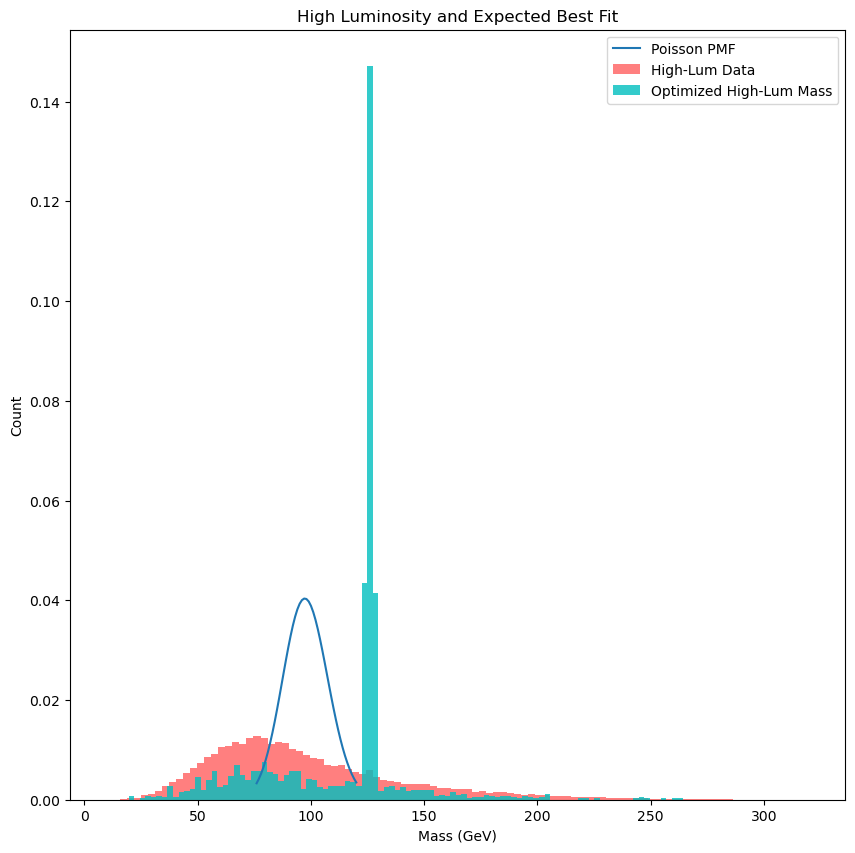

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

hl_optimized_mass_2 = []
for j in hl_unique_indexes:
    hl_optimized_mass_2.append(highLum[:,3][j])
qcdMu = np.mean(highLum[:,3])
x = np.arange(stats.poisson.ppf(0.01, mu=qcdMu),stats.poisson.ppf(0.99, mu=qcdMu))
ax.plot(x, stats.poisson.pmf(x, mu=qcdMu), ms=4, label='Poisson PMF')

ax.hist(highLum[:,3], bins=100, color='r', alpha=.5, label='High-Lum Data', density=True)
ax.hist(hl_optimized_mass_2, bins=100, alpha=.8, color='c', label="Optimized High-Lum Mass", density=True)
ax.legend(loc='upper right')
ax.set_title("High Luminosity and Expected Best Fit")
ax.set_ylabel("Count")
ax.set_xlabel("Mass (GeV)")

plt.show()

In [24]:
cdf_mean = stats.poisson.cdf(qcdMu,mu=60)
sig_mean = stats.norm.ppf(cdf_mean)

print(f"Significance: {sig_mean}")

Significance: 4.455295071427855


The significance is lower but close to 5 sigma.

## Problem 2

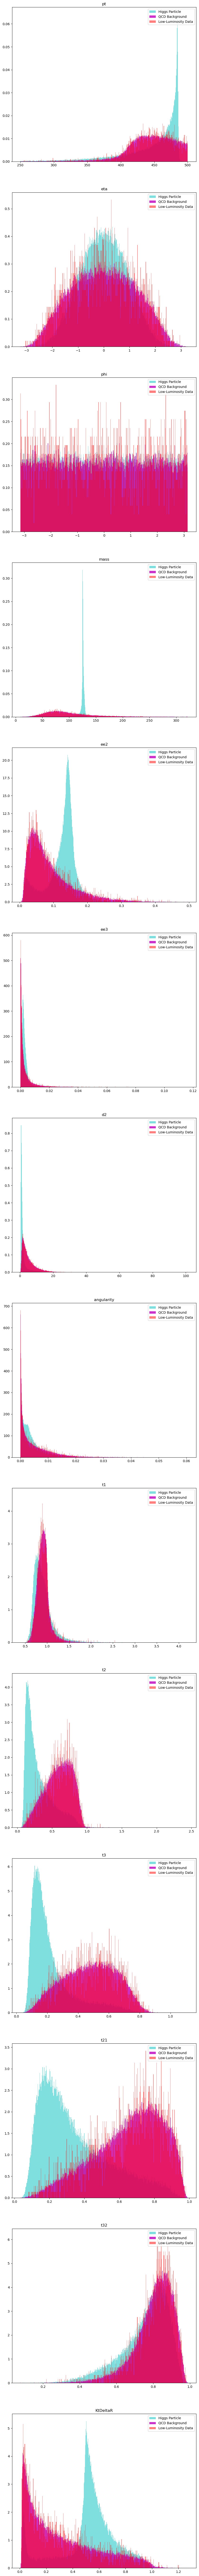

In [25]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(0,14):
    ax[i].hist(higgs[features_list[i]], 500, alpha=.5, color='c', density=True, label='Higgs Particle')
    ax[i].hist(qcd[features_list[i]], 500, alpha=.8, color='m', density=True, label='QCD Background')
    ax[i].hist(lowLum[:,i], 500, alpha=.5, color='r', density=True, label="Low-Luminosity Data")
    ax[i].set_title(features_list[i])  
    ax[i].legend(loc='upper right')
    
plt.show()

In [26]:
ll_mass_feature_raw = lowLum[:,3]
ll_tau21_feature_raw = lowLum[:,11]
ll_d2_feature_raw = lowLum[:,6]

ll_mass_indexes = select_indexes(124,128,ll_mass_feature_raw)

ll_tau21_feature_optimized = []
ll_d2_feature_optimized = []
for ind in ll_mass_indexes:
    ll_tau21_feature_optimized.append(ll_tau21_feature_raw[ind])
    ll_d2_feature_optimized.append(ll_d2_feature_raw[ind])

ll_d2_indexes = select_indexes(0,.5,ll_d2_feature_optimized)
ll_tau_indexes = select_indexes(0,.7,ll_tau21_feature_optimized) 

In [27]:
ll_master_list = []

ll_master_list.extend(ll_d2_indexes)
ll_master_list.extend(ll_tau_indexes)
ll_master_list.extend(ll_mass_indexes)
ll_unique_indexes = list(set(ll_master_list))

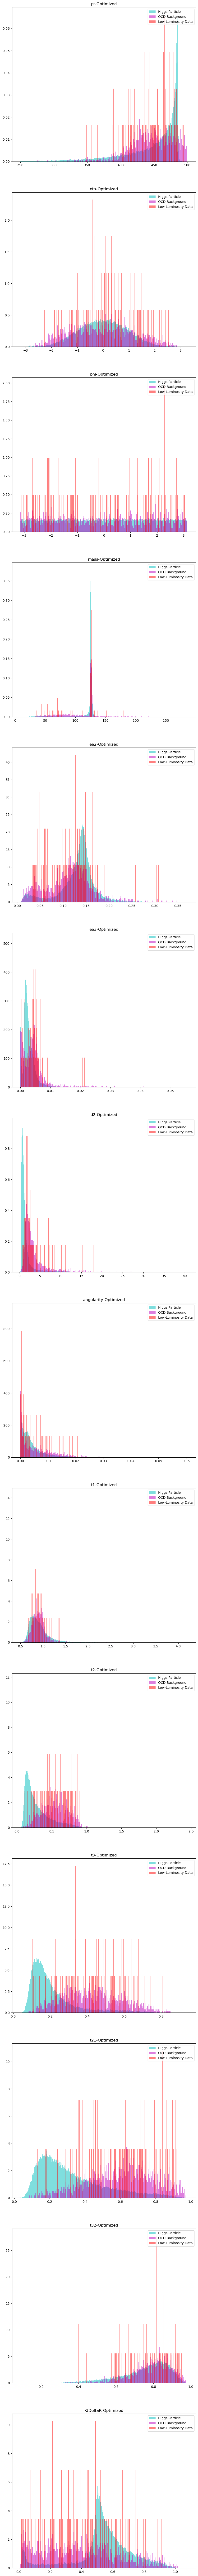

In [28]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(0,14):
    ll_optimized_fin = []
    for ind in ll_unique_indexes:
        ll_optimized_fin.append(lowLum[:,i][ind])
    
    qcd_optimized_fin = []
    for ind in qcd_unique_indexes:
        qcd_optimized_fin.append(qcd[features_list[i]][ind])
        
    higgs_optimized_fin = []
    for ind in higgs_unique_indexes:
        higgs_optimized_fin.append(higgs[features_list[i]][ind])
        
    ax[i].hist(higgs_optimized_fin, 500, alpha=.5, color='c', density=True, label='Higgs Particle') 
    ax[i].hist(qcd_optimized_fin, 500, alpha=.5, color='m', density=True, label='QCD Background')  
    ax[i].hist(ll_optimized_fin, 500, alpha=.5, color='r', density=True, label="Low-Luminosity Data")  

    ax[i].set_title(f"{features_list[i]}-Optimized")  
    ax[i].legend(loc='upper right')
    
plt.show() 

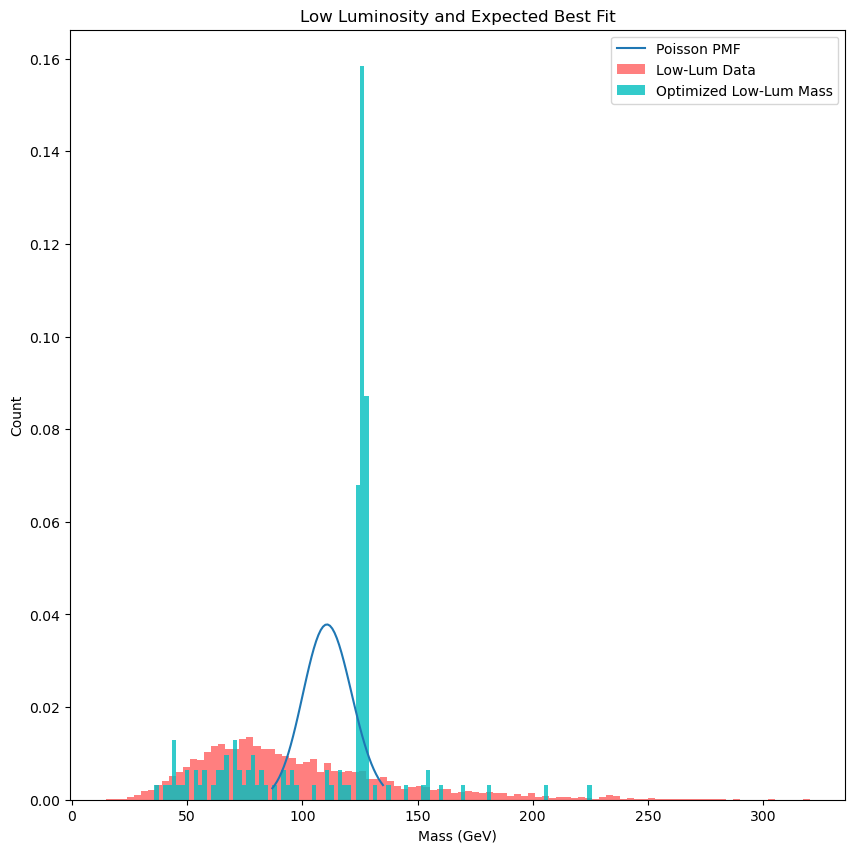

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ll_optimized_mass_2 = []
for j in ll_unique_indexes:
    ll_optimized_mass_2.append(lowLum[:,3][j])
qcdMu = np.mean(ll_optimized_mass_2)
x = np.arange(stats.poisson.ppf(0.01, mu=qcdMu),stats.poisson.ppf(0.99, mu=qcdMu))
ax.plot(x, stats.poisson.pmf(x, mu=qcdMu), ms=4, label='Poisson PMF')
ax.hist(lowLum[:,3], bins=100, color='r', alpha=0.5, label='Low-Lum Data', density=True)
ax.hist(ll_optimized_mass_2, bins=100, alpha=.8, color='c', label="Optimized Low-Lum Mass", density=True)
ax.legend(loc='upper right')
ax.set_title("Low Luminosity and Expected Best Fit")
ax.set_ylabel("Count")
ax.set_xlabel("Mass (GeV)")

plt.show()

In [30]:
cdf_mean = stats.poisson.cdf(qcdMu,mu=80)
sig_mean = stats.norm.ppf(cdf_mean)

print(f"Significance: {sig_mean}")

Significance: 3.339580977339517


Significance of low lumi data is much smaller than 5 sigma standard. Far less than the one generated by high lumi.

## Problem 3

In [31]:
print(f"Observed 5-Sigma Signal: 156")
cdf_mean = stats.poisson.cdf(np.mean(lowLum[:,3]),mu=156)
print(stats.norm.ppf(cdf_mean))

print(f"Expected 5-Sigma Signal: 167")
cdf_fin = stats.poisson.cdf(106.315,mu=167)
print(stats.norm.ppf(cdf_fin))

Observed 5-Sigma Signal: 156
-5.020434630731005
Expected 5-Sigma Signal: 167
-5.004336874148908


We can see that the difference between observed 5 sigma and the expected 5 sigma is very large. This means the processes we have done above, including slicing data and optimizing data, are not very accurate to the data itself. Looking back to end of lab 7 where I found over 5 sigma significance, this may show how powerful optimizing is which can really force data into the shape we want.